### Section 1: SciPy-Based ODE Simulation of Chemical Kinetics

This section demonstrates chemical reaction dynamics simulation using Python's SciPy solver, `scipy.integrate.solve_ivp`, designed for efficient handling of both stiff and non-stiff ordinary differential equation (ODE) systems. We first illustrate a basic irreversible first-order reaction (A → B) to establish fundamental kinetic behavior. Subsequently, we extend this approach to model a second-order bimolecular reaction (A + B → C), including a competing side reaction that consumes reactant B, highlighting interactions of parallel reaction pathways. Finally, a reversible first-order reaction (A ⇌ B) is simulated to examine chemical equilibrium dynamics and the interplay of forward and reverse reaction rates. These progressive examples illustrate SciPy's utility in modeling increasingly complex reaction mechanisms and visualizing their kinetic behaviors.

#### Subection 1.1: Irreversible First-Order Reaction Simulation (A → B)
In this subsection, we simulate a simple irreversible first-order reaction in which species A is converted into species B with a constant rate $k$. We define and solve the corresponding system of ordinary differential equations (ODEs) using the `solve_ivp` function and visualize the concentration profiles of both reactant and product over time. This example serves as a baseline for understanding exponential decay kinetics.

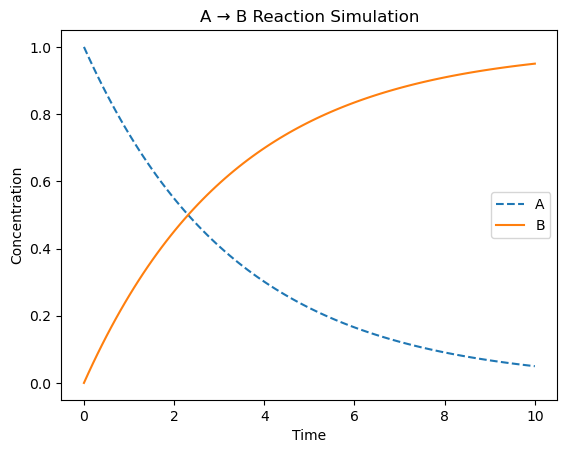

In [2]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt

# A → B with rate k
# Define the ODEs for A → B
def reaction(t, y, k):
    A, B = y
    dA_dt = -k * A
    dB_dt =  k * A
    return [dA_dt, dB_dt]

# Parameters
k = 0.3
y0 = [1.0, 0.0]   # Initial concentrations of A and B
t_span = (0, 10)  # Time range
t_eval = np.linspace(*t_span, 100)  # Time points for evaluation

# Solve the ODE system
sol = solve_ivp(reaction, t_span, y0, args=(k,), t_eval=t_eval, method='LSODA')

# Plot the concentration profiles
plt.plot(sol.t, sol.y[0], label='A', linestyle='--')
plt.plot(sol.t, sol.y[1], label='B')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.title('A → B Reaction Simulation')
plt.show()

#### Subection 1.2: Competitive Pathways with a Second-Order Main Reaction and Side Decomposition (A + B → C, B → Byproduct)
In this subsection, we model a bimolecular reaction where A and B react to form product C, while B also undergoes a competing side reaction. The main reaction follows second-order kinetics with rate $k_1$, and the side reaction consumes B at a first-order rate $k_2$. We solve the resulting system of nonlinear ODEs and illustrate how the presence of the side reaction affects the depletion of reactants and formation of product C over time.

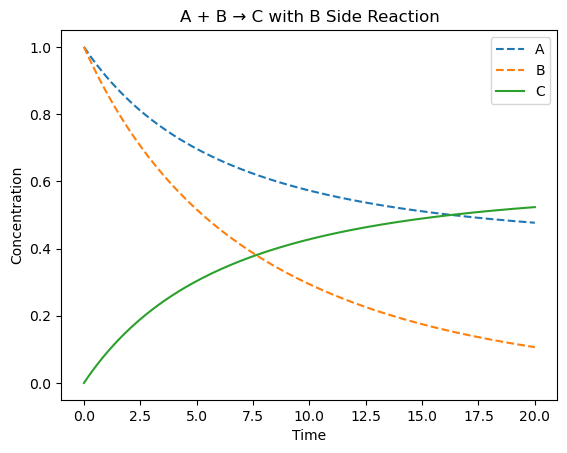

In [3]:
# A + B → C with B → Byproduct side reaction
# Define the ODEs for A + B → C and B → Byproduct
def reaction(t, y, k1, k2):
    A, B, C = y
    dA_dt = -k1 * A * B
    dB_dt = -k1 * A * B - k2 * B
    dC_dt =  k1 * A * B
    return [dA_dt, dB_dt, dC_dt]

# Parameters
k1 = 0.1               # rate for A + B → C
k2 = 0.05              # side reaction: B → Byproduct
y0 = [1.0, 1.0, 0.0]   # Initial concentrations of A and B
t_span = (0, 20)       # Time range
t_eval = np.linspace(*t_span, 200)

# Solve the ODE system
sol = solve_ivp(reaction, t_span, y0, args=(k1, k2), t_eval=t_eval, method='LSODA')

# Plot the concentration profiles
plt.plot(sol.t, sol.y[0], label='A', linestyle='--')
plt.plot(sol.t, sol.y[1], label='B', linestyle='--')
plt.plot(sol.t, sol.y[2], label='C', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('A + B → C with B Side Reaction')
plt.legend()
plt.show()

#### Subsection 1.3: Reversible First-Order Reaction Simulation (A ⇌ B)
In this subsection, we simulate a reversible reaction where species A converts to B with a forward rate $k_1$
and B converts back to A with a reverse rate $k_2$. The ODE system captures dynamic equilibrium behavior. By solving and plotting the concentration trajectories, we demonstrate the approach to equilibrium and the steady-state ratio of A and B governed by the reaction rates.

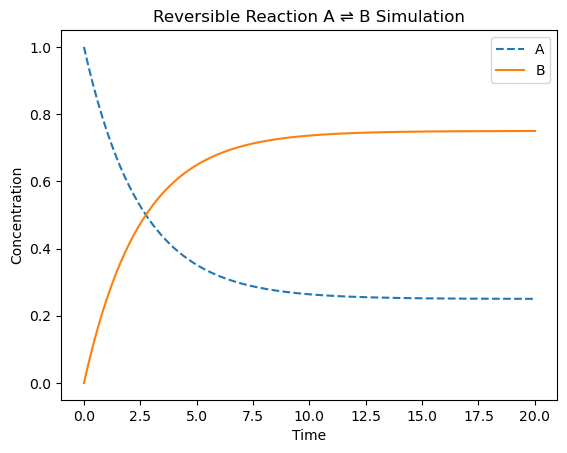

In [4]:
# A ⇌ B with forward rate k1 and reverse rate k2
# Define the ODEs for reversible reaction A ⇌ B
def reversible_reaction(t, y, k1, k2):
    A, B = y
    dA_dt = -k1 * A + k2 * B
    dB_dt =  k1 * A - k2 * B
    return [dA_dt, dB_dt]

# Parameters
k1 = 0.3  # Forward rate
k2 = 0.1  # Reverse rate
y0 = [1.0, 0.0]  # Initial concentrations
t_span = (0, 20)
t_eval = np.linspace(*t_span, 200)

# Solve the ODE system
sol = solve_ivp(reversible_reaction, t_span, y0, args=(k1, k2), t_eval=t_eval, method='LSODA')

# Plot the concentration profiles
plt.plot(sol.t, sol.y[0], label='A', linestyle='--')
plt.plot(sol.t, sol.y[1], label='B', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.title('Reversible Reaction A ⇌ B Simulation')
plt.legend()
plt.show()

### Section 2: ODE-Based Reaction Modeling Using JAX + Diffrax
This section introduces the simulation of a sequential reaction pathway (A + B → C → D → E) using JAX and Diffrax. By employing a high-performance solver (Dopri5), the concentration profiles of reactants and intermediates over time are computed and visualized, showcasing efficient modeling of complex reaction chains using modern automatic differentiation tools.

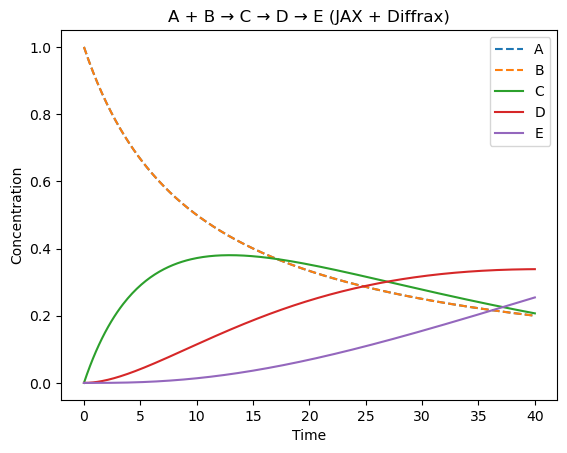

In [5]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from diffrax import diffeqsolve, Dopri5, ODETerm, SaveAt

# A + B → C → D → E (JAX + Diffrax)
# Define the ODE function for the full reaction chain
def ode_fn(t, y, args):
    k1, k2, k3 = args
    A, B, C, D, E = y
    dA_dt = -k1 * A * B
    dB_dt = -k1 * A * B
    dC_dt = k1 * A * B - k2 * C
    dD_dt = k2 * C - k3 * D
    dE_dt = k3 * D
    return jnp.array([dA_dt, dB_dt, dC_dt, dD_dt, dE_dt])

# Parameters
k1, k2, k3 = 0.1, 0.05, 0.03
y0 = jnp.array([1.0, 1.0, 0.0, 0.0, 0.0])  # Initial concentrations
t0, t1 = 0.0, 40.0
ts = jnp.linspace(t0, t1, 300)

# Set up and solve the ODE system
term = ODETerm(ode_fn)
solver = Dopri5()
saveat = SaveAt(ts=ts)

sol = diffeqsolve(
    term,
    solver,
    t0=t0,
    t1=t1,
    dt0=0.1,
    y0=y0,
    args=(k1, k2, k3),
    saveat=saveat
)

# Plot concentration curves over time
plt.plot(ts, sol.ys[:, 0], label='A', linestyle='--')
plt.plot(ts, sol.ys[:, 1], label='B', linestyle='--')
plt.plot(ts, sol.ys[:, 2], label='C')
plt.plot(ts, sol.ys[:, 3], label='D')
plt.plot(ts, sol.ys[:, 4], label='E')
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title("A + B → C → D → E (JAX + Diffrax)")
plt.legend()
plt.show()

### Section 3: Neural ODE-Based Spiral Classification in PyTorch
This section demonstrates the application of Neural Ordinary Differential Equations (Neural ODEs) for classifying data points arranged in intertwined spiral patterns. Using PyTorch and `torchdiffeq`, the model learns continuous dynamics for effective class separation, illustrating how neural ODEs can solve complex, non-linear classification tasks with clear visualization of decision boundaries.

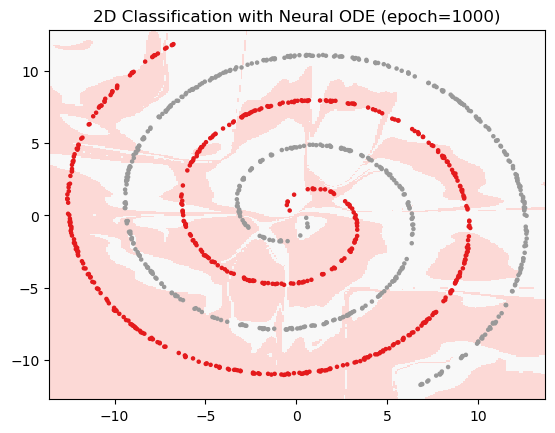

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim
from torchdiffeq import odeint
import numpy as np

# Spiral Classification using Neural ODE in PyTorch to learn continuous dynamics for class separation
# Generate 2D spiral dataset with noise
def generate_spiral2d(n_samples=512, noise=0.1):
    n = np.sqrt(np.random.rand(n_samples, 1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_samples, 1) * noise
    d1y =  np.sin(n)*n + np.random.rand(n_samples, 1) * noise
    d2x =  np.cos(n)*n + np.random.rand(n_samples, 1) * noise
    d2y = -np.sin(n)*n + np.random.rand(n_samples, 1) * noise
    X = np.vstack((np.hstack((d1x, d1y)), np.hstack((d2x, d2y))))
    y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))
    return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.long)

# Define the ODE function used in the neural ODE
class ODEF(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 64),
            nn.Tanh(),
            nn.Linear(64, 2)
        )
    def forward(self, t, x):
        return self.net(x)

# Wrap the ODE into a neural network module
class NeuralODE(nn.Module):
    def __init__(self, odefunc):
        super().__init__()
        self.odefunc = odefunc
    def forward(self, x, t=torch.tensor([0, 1.0])):
        out = odeint(self.odefunc, x, t, method='rk4')
        return out[1]

# Prepare data and model
X, y = generate_spiral2d()
dataset = TensorDataset(X, y)
loader = DataLoader(dataset, batch_size=128, shuffle=True)

odefunc = ODEF()
neural_ode = NeuralODE(odefunc)
model = nn.Sequential(neural_ode, nn.Linear(2, 2))

# Training setup
optimizer = optim.Adam(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

# Training loop
for epoch in range(1000):
    for xi, yi in loader:
        pred = model(xi)
        loss = loss_fn(pred, yi)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

# Generate prediction grid for visualization
with torch.no_grad():
    min_x, max_x = X[:, 0].min().item(), X[:, 0].max().item()
    min_y, max_y = X[:, 1].min().item(), X[:, 1].max().item()
    pad = 1.0
    gx, gy = torch.meshgrid(
        torch.linspace(min_x - pad, max_x + pad, 300),
        torch.linspace(min_y - pad, max_y + pad, 300),
        indexing='ij'
    )
    grid = torch.stack([gx.flatten(), gy.flatten()], dim=-1).to(X.device)
    out = model(grid)
    out = torch.where(torch.isnan(out), torch.zeros_like(out), out)
    preds = torch.argmax(out, dim=1).reshape(300, 300)

# Plot decision boundary and data points
plt.pcolormesh(gx.numpy(), gy.numpy(), preds.cpu().numpy(), cmap='Pastel1', shading='auto', alpha=0.5)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='Set1', s=5)
plt.xlim(min_x - pad, max_x + pad)
plt.ylim(min_y - pad, max_y + pad)
plt.title("Classification with Neural ODE (epoch=1000)")
plt.show()

#### Section 4: Modeling Enzyme Kinetics with Tellurium
This section explores enzyme-catalyzed reactions through the simulation of the classic Michaelis–Menten kinetics scenario (S + E ⇌ ES → P). Leveraging Tellurium's straightforward reaction notation and built-in simulation tools, the dynamic behaviors of substrate, enzyme, complex, and product concentrations are visualized, providing clear insights into enzymatic reaction mechanisms.

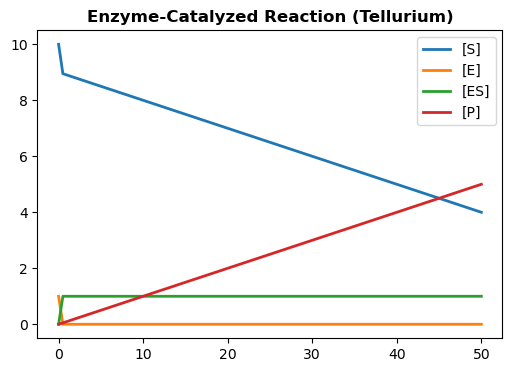

In [3]:
import tellurium as te

# Enzyme-Catalyzed Reaction S + E ⇌ ES → P (Tellurium)
# Load reaction model into Tellurium
rr = te.loada(
"""
model enzyme_reaction
  // Initial concentrations
  S = 10;
  E = 1;
  ES = 0;
  P = 0;

  // Rate constants
  k1 = 1e5;
  k2 = 0.1;
  k3 = 0.1;

  // Reactions
  J1: S + E -> ES; k1*S*E;
  J2: ES -> S + E; k2*ES;
  J3: ES -> E + P; k3*ES;
end
""")

# Simulate the reaction over time
result = rr.simulate(0, 50, 100)

# Plot concentration time courses
rr.plot(result, title="Enzyme-Catalyzed Reaction (Tellurium)")